# 1000ml Retail Project

## Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


plt.rcParams['figure.facecolor'] = 'w'

## import data

In [2]:
#setting dataframe as df
df = pd.read_csv("/home/bonk/Downloads/advertising.csv")

## checking the data

In [37]:
df.head()

,Day,Social,Google Adwords,Youtube,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

A total of 200 days of sales have been observed. Marketing techniques such as social media, google adwords and youtube are tracked and compared to the number of sales. No units are given to us so we assume it is per unit price.

In [3]:
df.corr()['Sales']

Day              -0.021306
Social            0.901208
Google Adwords    0.349631
Youtube           0.157960
Sales             1.000000
Name: Sales, dtype: float64

The table above shows the correlation between everything to Sales. There is a negative correlation between the days that passes by and Sales. This is just a very small value though. Social media seems to have the highest correlation to Sales and Youtube has the least with Google Adwords being in the middle and leaning towards the lower end. 

Visualization of the relationship between sales and advertising

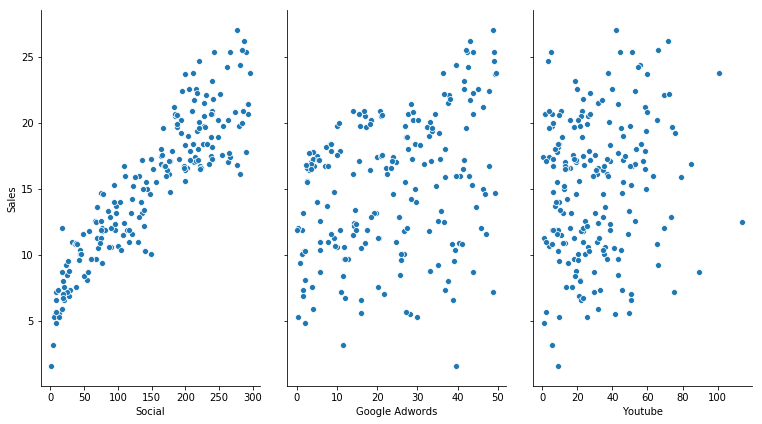

In [47]:
sns.pairplot(df,
             x_vars=['Social','Google Adwords','Youtube'],
             y_vars='Sales',
            size= 6,
            aspect=0.6)

## Heatmap

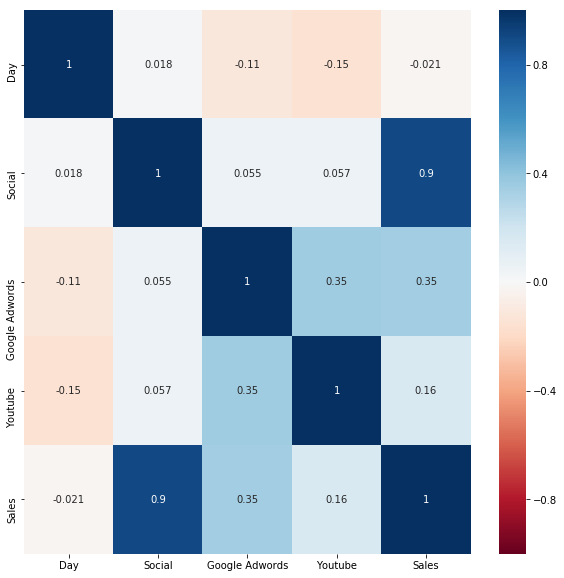

In [4]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr().round(3),
           cmap="RdBu",
           vmin = -1,
           vmax=1,
           annot=True)
plt.show()

This heatmap shows the correlation between all the columns. The more blue it is, the better the correlation gets and vice versa with red.

In [5]:
df.describe()

,Day,Social,Google Adwords,Youtube,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,15.130500
std,57.879185,85.854236,14.846809,21.778621,5.283892
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,11.000000
50%,100.500000,149.750000,22.900000,25.750000,16.000000
75%,150.250000,218.825000,36.525000,45.100000,19.050000
max,200.000000,296.400000,49.600000,114.000000,27.000000


The table above shows a summary of the data, from the maximum of all columns to the minium and mean of all columns. 

# Social vs Sales

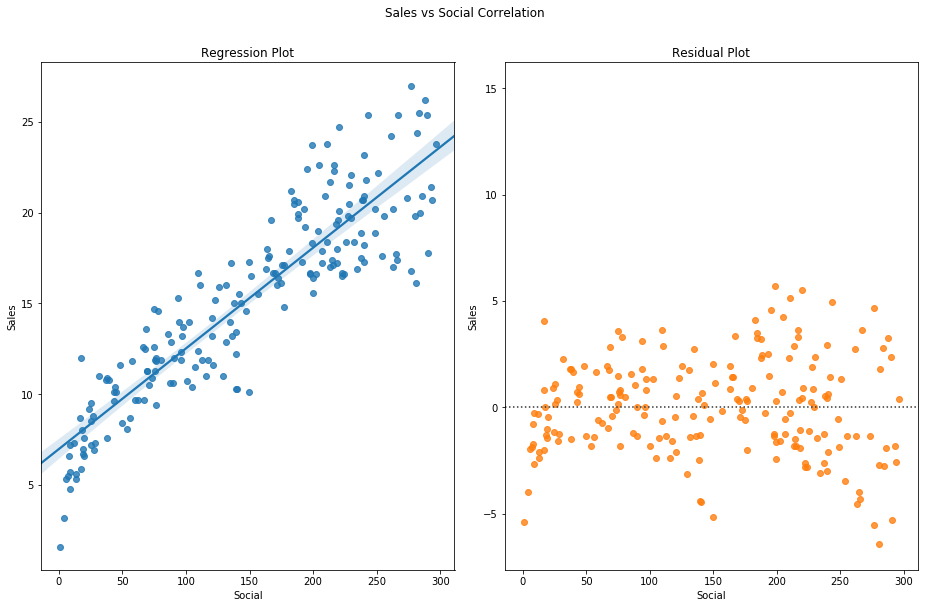

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Social',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Social',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Social Correlation", y=1.05)

plt.show()

As you can see from the graph, there is a huge postive correlation between sales and the use of social media. This is a channel worth looking into and possibly investing more into. 

In [49]:
X_social = df['Social']
y = df['Sales']

In [50]:
X_social = sm.add_constant(X_social)
X_social.head()

,const,Social
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [51]:
lin_model_social = sm.OLS(y, X_social, hasconst=True).fit()

In [53]:
lin_model_social.params

const     6.974821
Social    0.055465
dtype: float64

## Google adwords vs Sales

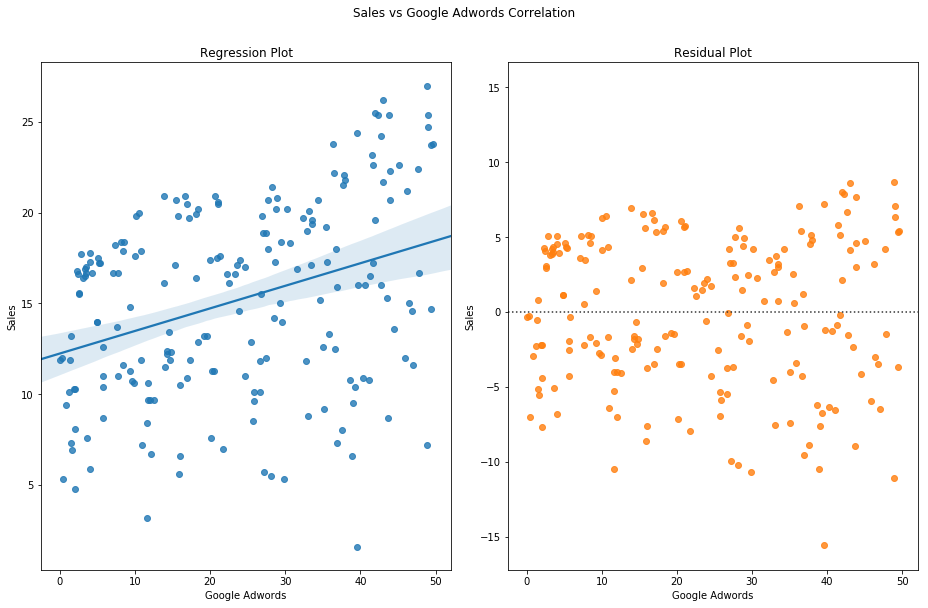

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Google Adwords',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Google Adwords',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Google Adwords Correlation", y=1.05)

plt.show()

There is also a positive correlation between Google Adwords and Sales. The slope of the graph is not as steep as the previous but positive nonetheless. The points are also more spread apart indicating there might be more to it. 

In [55]:
X_google = df['Google Adwords']
y = df['Sales']

In [56]:
X_google = sm.add_constant(X_google)
X_google.head()

,const,Google Adwords
0,1.0,37.8
1,1.0,39.3
2,1.0,45.9
3,1.0,41.3
4,1.0,10.8


In [57]:
lin_model_google = sm.OLS(y, X_google, hasconst=True).fit()

In [58]:
lin_model_google.params

const             12.235722
Google Adwords     0.124432
dtype: float64

## Youtube vs Sales

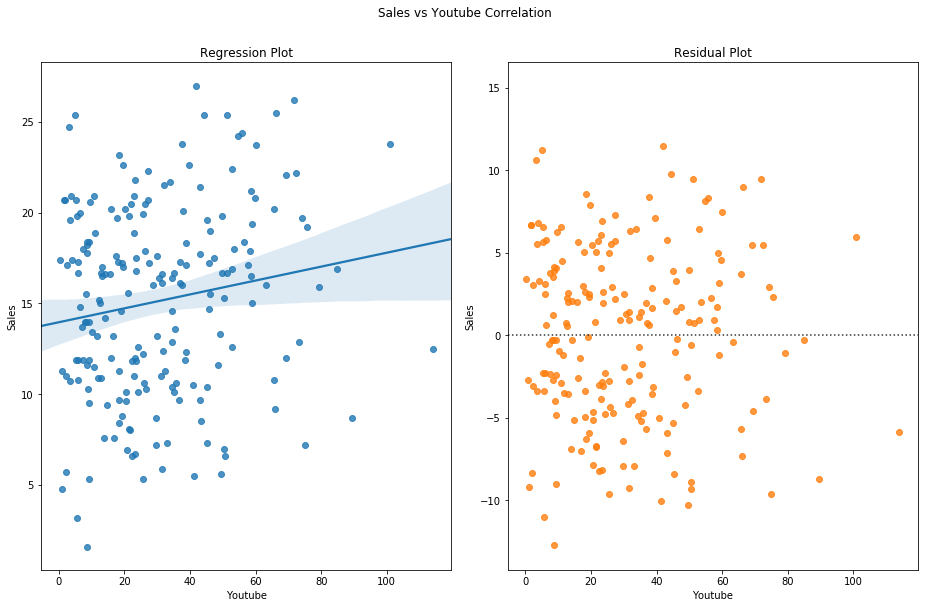

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Youtube',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Youtube',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Youtube Correlation", y=1.05)

plt.show()

Youtube seems to have to least effect on sales compared to the other choices. 

In [59]:
X_Youtube = df['Youtube']
y = df['Sales']

In [60]:
X_Youtube = sm.add_constant(X_Youtube)
X_Youtube.head()

,const,Youtube
0,1.0,69.2
1,1.0,45.1
2,1.0,69.3
3,1.0,58.5
4,1.0,58.4


In [62]:
lin_model_Youtube.params

Youtube    0.341793
dtype: float64

A better model must be made for all three advertising strategies.

# Regression Modeling

In [78]:
#Set variables
X1 = df[['Youtube','Google Adwords','Social']]
y1 = df['Sales']

#add constant
X1 = sm.add_constant(X1)

In [77]:
#model
lin_model_all = sm.OLS(y1, X1, hasconst=True).fit()

In [79]:
print(lin_model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.13e-99
Time:                        03:37:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6251      0.308     15.

P values for google Adwords and Social are 0 and are significant to show that there is a correlation between those and sales, whereas Youtube is significantly higher to show that there are less correlation to sales.




In [12]:
lin_model_all.mse_resid

5.918166768432623

In [17]:
#Set variables
X2 = df[['Youtube','Google Adwords','Social']]
y2 = df['Sales']

#add constant
# X2 = sm.add_constant(X2)

In [18]:
#Train Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                       y2,
                                                       test_size = 0.2,
                                                       random_state = 42)

In [19]:
lin_model_train = sm.OLS(y2_train, X2_train).fit()

In [20]:
print(lin_model_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2327.
Date:                Wed, 06 May 2020   Prob (F-statistic):                   7.48e-130
Time:                        01:33:48   Log-Likelihood:                         -367.10
No. Observations:                 160   AIC:                                      740.2
Df Residuals:                     157   BIC:                                      749.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [21]:
lin_model_train.mse_resid

5.869717483696831

In [22]:
y2_test_predictions = lin_model_train.predict(X2_test)

In [23]:
r2_score(y2_test, y2_test_predictions)

0.7923973555995534

In [24]:
lin_model_train.rsquared - r2_score(y2_test, y2_test_predictions)

0.1856047195997751

In [25]:
X3_train, X3_test, y3_train,y3_test = train_test_split(X2, 
                                                       y2,
                                                       test_size = 0.2,
                                                      random_state = 42)

In [26]:
#Scale data with scalar object
scaler = StandardScaler()

scaler.fit(X3_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
# transforming train and test data
X3_train_scale = scaler.transform(X3_train)
X3_test_scale = scaler.transform(X3_test)

In [28]:
X3_train_scale = sm.add_constant(X3_train_scale)
X3_test_scale = sm.add_constant(X3_test_scale)

In [29]:
#Fitting model
lin_model_train_scale = sm.OLS(y3_train, X3_train_scale).fit()

In [30]:
print(lin_model_train_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.51e-78
Time:                        01:34:37   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3306      0.131    117.049      0.0

In [31]:
#r2_value for scaled test data
y3_test_scale_prediction = lin_model_train_scale.predict(X3_test_scale)

r2_score(y3_test, y3_test_scale_prediction)

0.9059011844150826

In [32]:
X1.columns

Index([u'const', u'Youtube', u'Google Adwords', u'Social'], dtype='object')

In [33]:
lin_model_train_scale.params

const    15.330625
x1        0.087916
x2        1.489840
x3        4.587208
dtype: float64

From the above analysis, Youtube has a coefficient very close to 0 meaning it is very insignificant towards the sales in terms of advertising. This form of advertising clearly isn't working or something must be done to change it. Maybe it is better to remove it completely and focus on the other two or look for alternatives. Social and Google Adwords on the other hand are significant and correlates well towards sales. 